<a href="https://colab.research.google.com/github/ShoroukKaram/Customer_Segmentation_using_Python/blob/main/customer_segmentation_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [31]:
df.shape

(541909, 8)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [33]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [34]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [35]:
# Drop rows with missing 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country'
df_cleaned = df.dropna(subset=['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country'])

# Fill missing 'CustomerID' with a placeholder value, e.g., -1
df_cleaned['CustomerID'].fillna(-1, inplace=True)


In [36]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [37]:
# Convert few column
df['InvoiceNo'] = df['InvoiceNo'].astype('str').fillna('')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M').dt.date.fillna('')

In [38]:
#Change blank space into nan
df = df.replace(r'^\s*$', np.nan, regex=True)

In [39]:
#Remove customer id with nan values
df = df.dropna(subset = ['CustomerID'])

In [40]:
#Remove quantity less than 0
df = df.drop(df.index[df['Quantity'] <= 0 ])

In [41]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


Epoch 1/10
110/110 [==============================] - 2s 8ms/step - loss: 10.2107 - val_loss: 1.9489
Epoch 2/10
110/110 [==============================] - 1s 5ms/step - loss: 9.9746 - val_loss: 1.8972
Epoch 3/10
110/110 [==============================] - 1s 5ms/step - loss: 9.7024 - val_loss: 1.8636
Epoch 4/10
110/110 [==============================] - 0s 4ms/step - loss: 9.4413 - val_loss: 1.7945
Epoch 5/10
110/110 [==============================] - 0s 2ms/step - loss: 9.1877 - val_loss: 1.7464
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 8.9466 - val_loss: 1.7041
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 8.7141 - val_loss: 1.6588
Epoch 8/10
110/110 [==============================] - 0s 2ms/step - loss: 8.4902 - val_loss: 1.6173
Epoch 9/10
110/110 [==============================] - 0s 2ms/step - loss: 8.2554 - val_loss: 1.5724
Epoch 10/10
137/137 [==============================] - 0s 1ms/step


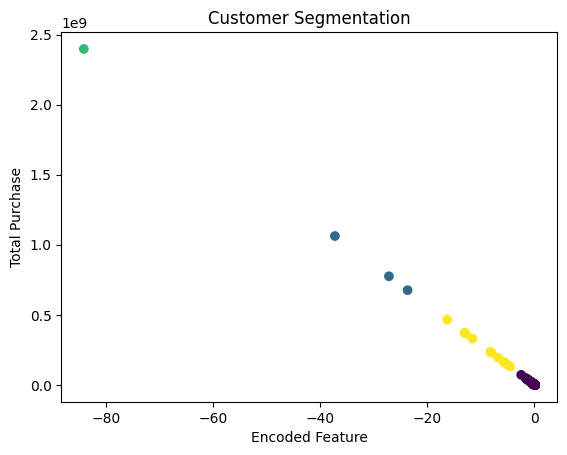

In [42]:

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans

# Calculate total purchase amount for each customer
customer_purchase = data.groupby('CustomerID')['Quantity', 'UnitPrice'].sum()
customer_purchase['TotalPurchase'] = customer_purchase['Quantity'] * customer_purchase['UnitPrice']

# Create features (X) based on the total purchase amount
X = customer_purchase[['TotalPurchase']].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


encoding_dim = 1
model = Sequential()
model.add(Dense(encoding_dim, activation='linear', input_dim=X_scaled.shape[1]))
model.add(Dense(X_scaled.shape[1], activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_scaled, X_scaled, epochs=10, batch_size=32, validation_split=0.2)

# Encode the data using the trained autoencoder
encoded_X = model.predict(X_scaled)

# Apply KMeans clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(encoded_X)


customer_purchase['Cluster'] = cluster_labels


plt.scatter(encoded_X[:, 0], customer_purchase['TotalPurchase'], c=cluster_labels)
plt.xlabel('Encoded Feature')
plt.ylabel('Total Purchase')
plt.title('Customer Segmentation')
plt.show()
